In [ ]:
%load_ext autoreload
%autoreload 2
import torch

In [1]:
modelstr = "clip_vit" #"clipseg", "clip_resnet"

In [2]:
img = "/dfs/scratch1/gmachi/gcp_backup/data/coco/val2017/val2017/000000000139.jpg"

In [45]:
if modelstr == "clip_vit":
    from transformers import CLIPProcessor, CLIPTokenizer, CLIPModel, CLIPVisionModel
    tokenizer = CLIPTokenizer.from_pretrained("openai/clip-vit-base-patch32")
    processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch32")
    model_clip = CLIPModel.from_pretrained("openai/clip-vit-base-patch32")
    model = CLIPVisionModel.from_pretrained("openai/clip-vit-base-patch32")

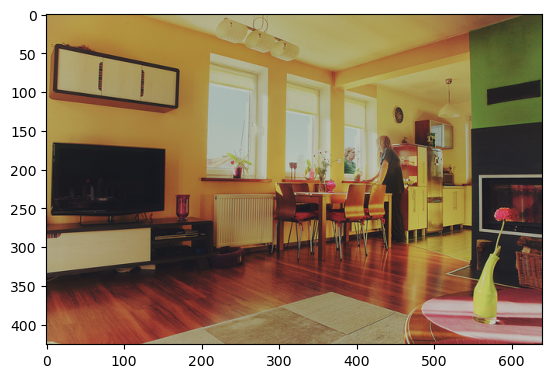

In [14]:
from PIL import Image
im = Image.open(img)
import matplotlib.pyplot as plt
plt.imshow(im)

In [27]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


In [28]:
img = processor(images=[im], return_tensors="pt", padding=True).to(device)
model_clip.to(device)
z = model_clip.get_image_features(**img)

In [32]:
l = [module for module in model_clip.modules() if not isinstance(module, nn.Sequential)]
l

[CLIPModel(
   (text_model): CLIPTextTransformer(
     (embeddings): CLIPTextEmbeddings(
       (token_embedding): Embedding(49408, 512)
       (position_embedding): Embedding(77, 512)
     )
     (encoder): CLIPEncoder(
       (layers): ModuleList(
         (0): CLIPEncoderLayer(
           (self_attn): CLIPAttention(
             (k_proj): Linear(in_features=512, out_features=512, bias=True)
             (v_proj): Linear(in_features=512, out_features=512, bias=True)
             (q_proj): Linear(in_features=512, out_features=512, bias=True)
             (out_proj): Linear(in_features=512, out_features=512, bias=True)
           )
           (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
           (mlp): CLIPMLP(
             (activation_fn): QuickGELUActivation()
             (fc1): Linear(in_features=512, out_features=2048, bias=True)
             (fc2): Linear(in_features=2048, out_features=512, bias=True)
           )
           (layer_norm2): LayerNorm((512

In [46]:
# patch_encoder = model_clip.vision_model.embeddings
activation = {}
def get_activation(name):
    def hook(model, input, output):
        activation[name] = output.detach()
    return hook
    
model.vision_model.embeddings.register_forward_hook(get_activation('embeddings'))

In [47]:
output = model(img)
print(activation['embeddings'])


AttributeError: 